In [1]:
import time
import numpy as np
import h5py
#import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v2 import *
from image_input import *

np.random.seed(1)

train_x_orig, train_y = imput_training_set()

test_x_orig, test_y = imput_testing_set()

num_px = 64

# Reshape the training and test examples
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1)   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1)

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

### CONSTANTS ###
layers_dims = [12288, 20, 7, 5, 1] #  5-layer model

# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, lr, iterations, print_cost = True):#lr was 0.009
    learning_rate = lr
    num_iterations = iterations
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.

    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost

    # Parameters initialization.
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###

    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###

        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###

        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###

        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

        # Print the cost every 1000 training example
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 10 == 0:
            costs.append(cost)

    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters

train_x's shape: (12288, 100)
test_x's shape: (12288, 20)


Cost after iteration 0: 0.534774
Cost after iteration 1000: 0.200631
Cost after iteration 2000: 0.161385


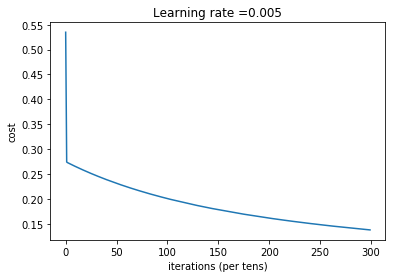

Learning rate: 0.005
Iteration: 3000
Train data:
Accuracy: 0.99
Test data:
Accuracy: 0.95
Cost after iteration 0: 0.534774
Cost after iteration 1000: 0.161597
Cost after iteration 2000: 0.120664


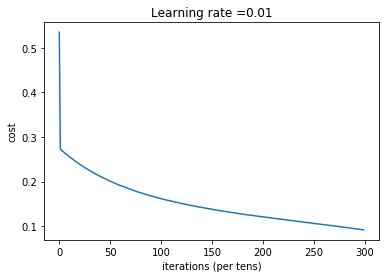

Learning rate: 0.01
Iteration: 3000
Train data:
Accuracy: 0.99
Test data:
Accuracy: 0.95
Cost after iteration 0: 0.534774
Cost after iteration 1000: 0.122081
Cost after iteration 2000: 0.092543


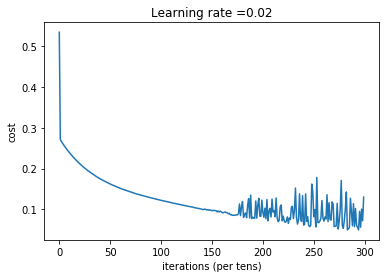

Learning rate: 0.02
Iteration: 3000
Train data:
Accuracy: 0.99
Test data:
Accuracy: 0.95
Cost after iteration 0: 0.534774
Cost after iteration 1000: 0.105365
Cost after iteration 2000: 0.061545


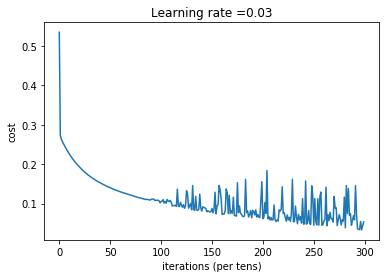

Learning rate: 0.03
Iteration: 3000
Train data:
Accuracy: 0.99
Test data:
Accuracy: 0.95
Cost after iteration 0: 0.534774
Cost after iteration 1000: 0.115346
Cost after iteration 2000: 0.074469


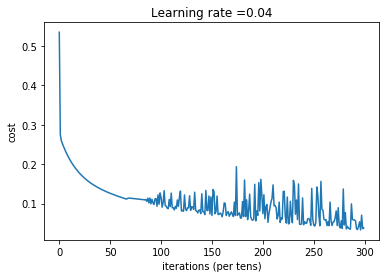

Learning rate: 0.04
Iteration: 3000
Train data:
Accuracy: 0.99
Test data:
Accuracy: 0.95


In [2]:
for lr in [50,100,200,300,400]:
    for i in [3000]:

        rate = lr/10000
        iteration = i
        parameters = L_layer_model(train_x, train_y, layers_dims, rate, iteration, print_cost = True)
        #L_layer_model(X, Y, layers_dims, lr, iterations, print_cost=False)
        print("Learning rate:", rate)
        print("Iteration:", i)
        print("Train data:")
        pred_train = predict(train_x, train_y, parameters)
        print("Test data:")
        pred_test = predict(test_x, test_y, parameters)

Cost after iteration 0: 0.534774
Cost after iteration 1000: 0.200631
Cost after iteration 2000: 0.161385
Cost after iteration 3000: 0.137455
Cost after iteration 4000: 0.120339


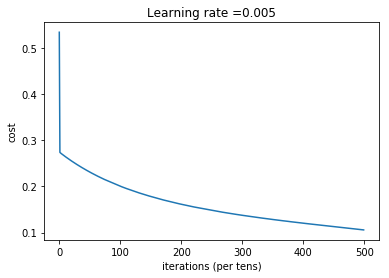

Learning rate: 0.005
Iteration: 5000
Train data:
Accuracy: 0.99
Test data:
Accuracy: 0.95
Cost after iteration 0: 0.534774
Cost after iteration 1000: 0.178265
Cost after iteration 2000: 0.137591
Cost after iteration 3000: 0.113094
Cost after iteration 4000: 0.090429


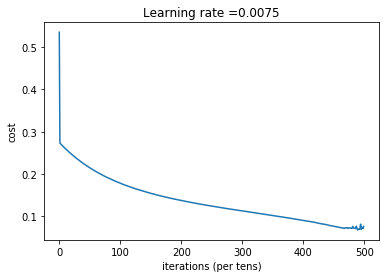

Learning rate: 0.0075
Iteration: 5000
Train data:
Accuracy: 0.99
Test data:
Accuracy: 0.95
Cost after iteration 0: 0.534774
Cost after iteration 1000: 0.161597
Cost after iteration 2000: 0.120664
Cost after iteration 3000: 0.091001
Cost after iteration 4000: 0.081580


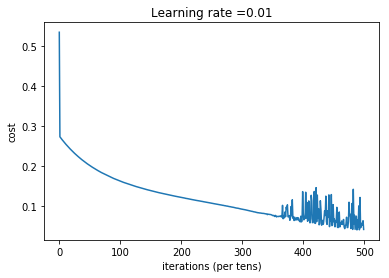

Learning rate: 0.01
Iteration: 5000
Train data:
Accuracy: 1.0
Test data:
Accuracy: 0.95


In [3]:
for lr in [50, 75, 100]:
    for i in [5000]:

        rate = lr/10000
        iteration = i
        parameters = L_layer_model(train_x, train_y, layers_dims, rate, iteration, print_cost = True)
        #L_layer_model(X, Y, layers_dims, lr, iterations, print_cost=False)
        print("Learning rate:", rate)
        print("Iteration:", i)
        print("Train data:")
        pred_train = predict(train_x, train_y, parameters)
        print("Test data:")
        pred_test = predict(test_x, test_y, parameters)

Cost after iteration 0: 0.534774
Cost after iteration 1000: 0.200631
Cost after iteration 2000: 0.161385
Cost after iteration 3000: 0.137455
Cost after iteration 4000: 0.120339
Cost after iteration 5000: 0.105588
Cost after iteration 6000: 0.090241
Cost after iteration 7000: 0.070904
Cost after iteration 8000: 0.052344
Cost after iteration 9000: 0.040696


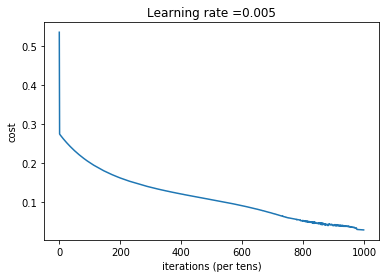

Learning rate: 0.005
Iteration: 10000
Train data:
Accuracy: 1.0
Test data:
Accuracy: 0.95


In [4]:
for lr in [50]:
    for i in [10000]:

        rate = lr/10000
        iteration = i
        parameters = L_layer_model(train_x, train_y, layers_dims, rate, iteration, print_cost = True)
        #L_layer_model(X, Y, layers_dims, lr, iterations, print_cost=False)
        print("Learning rate:", rate)
        print("Iteration:", i)
        print("Train data:")
        pred_train = predict(train_x, train_y, parameters)
        print("Test data:")
        pred_test = predict(test_x, test_y, parameters)